<h1><center>Machine Learning on TELECOM CHURN PREDICTION</center><h1>

 # **Table of Contents**

1. [Introduction](#Section1)<br>
2. [Problem Statement](#Section2)<br>
3. [Installing & Importing Libraries](#Section3)<br>
4. [Data Acquisition & Description](#Section4)<br>
5. [Preprofiling](#Section5) <br>
6. [Exploratory Data Analysis](#Section6)<br>
7. [Logistic Regression](#Section7)<br>

# 2. Problem Statement
**The company suffers from the following problems:**
- Due to the boom in the telecom industry with 4G technology, it has become a pain in the neck for the company to retain their customers.
- They are in the middle of setting up more cell sites on the 4G network to improve their 4G services.
- It is plausible for customers to choose 4G services over 3G services due to benefits of cost, speed, latency etc.


<a id = Section3></a>
# **3. Installing & Importing Libraries**

In [1]:
!pip install -q --upgrade pandas-profiling 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns
%matplotlib inline

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

 <a id = Section4></a>
# **4. Dataset Feature Description** 

|**Column Name**|**Description**|
| :-- | :--
|**CustomerID**|Passenger Identity|
|**Gender**|Whether the customer is a male or a female|
|**SeniorCitizen**|Whether the customer is a senior citizen or not (1, 0)|
|**Partner**|Whether the customer has a partner or not (Yes, No)|
|**Dependents**|Whether the customer has dependents or not (Yes, No)|
|**Tenure**|Number of months the customer has stayed with the company|
|**PhoneService**|Whether the customer has a phone service or not (Yes, No)|
|**MultipleLines**|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|**InternetService**|Customer’s internet service provider (DSL, Fiber optic, No)|
|**OnlineSecurity**|Whether the customer has online security or not (Yes, No, No internet service)|
|**OnlineBackup**|Whether the customer has online backup or not (Yes, No, No internet service)|
|**DeviceProtection**|Whether the customer has device protection or not (Yes, No, No internet service)|
|**TechSupport**|Whether the customer has tech support or not (Yes, No, No internet service)|
|**StreamingTV**|Whether the customer has streaming TV or not (Yes, No, No internet service)|
|**StreamingMovies**|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|**Contract**|The contract term of the customer (Month-to-month, One year, Two year)|
|**PaperlessBilling**|Whether the customer has paperless billing or not (Yes, No)|
|**PaymentMethod**|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|**MonthlyCharges**|The amount charged to the customer monthly|
|**TotalCharges**|The total amount charged to the customer|
|**Churn**|**Whether the customer churned or not (Yes or No)**|

In [5]:
df_train=pd.read_csv('https://raw.githubusercontent.com/smithaprakash91/Telecom-Industry/main/Churn_train.csv')
df_train.shape

(5634, 21)

In [6]:
df_test=pd.read_csv('https://raw.githubusercontent.com/smithaprakash91/Telecom-Industry/main/Churn_test.csv')
df_test.shape

(1409, 20)

In [7]:
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [9]:
df_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df_train.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5634,5634,5634.000000,5634,5634,5634.000000,5634,5634,5634,5634,...,5634,5634,5634,5634,5634,5634,5634,5634.000000,5634,5634
unique,5634,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,5291,2
top,3612-YUNGG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,19.65,No
freq,1,2838,NaN,2932,3968,NaN,5087,2700,2479,2801,...,2473,2781,2246,2213,3104,3321,1893,NaN,8,4113
mean,NaN,NaN,0.161874,NaN,NaN,32.277955,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.779127,NaN,NaN
std,NaN,NaN,0.368368,NaN,NaN,24.555211,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.104993,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.400000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.375000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


### ** Numerical Data Distribution:**

- Plotting all **Numerical features to analyze the distribution** of their past.

In [12]:
import random
r = lambda: random.randint(0,255)
print('#%02X%02X%02X' % (r(),r(),r()))

#E68300


In [13]:
import random
color = "%06x" % random.randint(0, 0xFFFFFF)

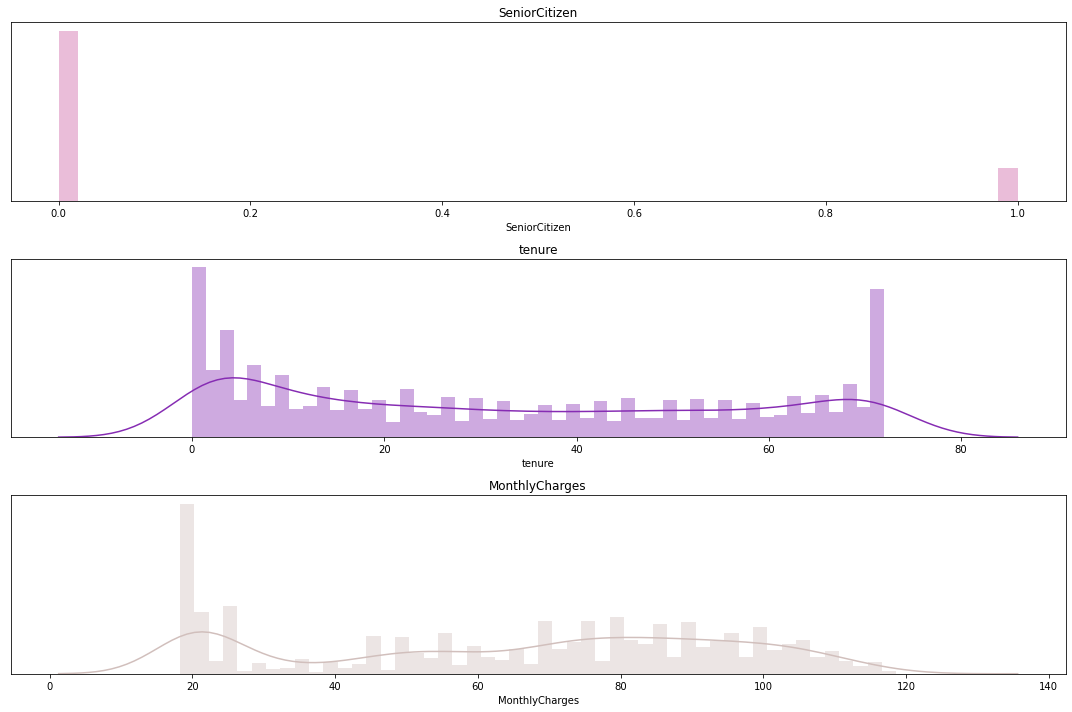

In [14]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, sharex = False, figsize=(15, 10))
colors = []
for i in range(3):
    colors.append('#%06X' % random.randint(0, 0xFFFFFF))
columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
for ax, col, color in zip(axes.flat, columns, colors):
  sns.distplot(a = df_train[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, yticks=[])
  ax.grid(False)
plt.tight_layout()
plt.show()

In [18]:
duplicate=df_train.duplicated()
print(duplicate.sum())
df_train[duplicate]

0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


 <a id = Section5></a>
# **5. Pre Profiling**

In [24]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df_train)
#prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

 <a id = Section6></a>
# 6. Exploratory Data Analysis

**Question 1: What's the gender ratio in telecom industry as in customers?**

In [25]:
df_train['gender'].value_counts()

Male      2838
Female    2796
Name: gender, dtype: int64

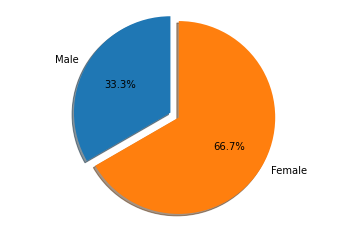

In [31]:
import matplotlib.pyplot as plt

labels = 'Male', 'Female'
sizes = [15, 30]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Around **68%** are **Females** and **32%** are **Males**

**Replacing Categorical value into Numerical**

In [33]:
df_train['gender'].replace(['Male', 'Female'], [0, 1], inplace = True)
df_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,0,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,1,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,0,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,0,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,0,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-LKXBR,0,1,No,No,9,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.50,918.6,Yes
5630,3507-GASNP,0,0,No,Yes,60,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,1189.9,No
5631,8868-WOZGU,0,0,No,No,28,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.70,2979.5,Yes
5632,1251-KRREG,0,0,No,No,2,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,54.40,114.1,Yes


**Question 2: What is the minimum and maximum value in the MonthlyCharges?**

In [34]:
df_train['MonthlyCharges'].nunique()

1494

In [48]:
df_train['MonthlyCharges'].describe()

count    5634.000000
mean       64.779127
std        30.104993
min        18.250000
25%        35.400000
50%        70.375000
75%        89.850000
max       118.650000
Name: MonthlyCharges, dtype: float64

**-The minimum value in the monthly charges is 18.25**

**-The maximum value in the monthly charges is 118.65**

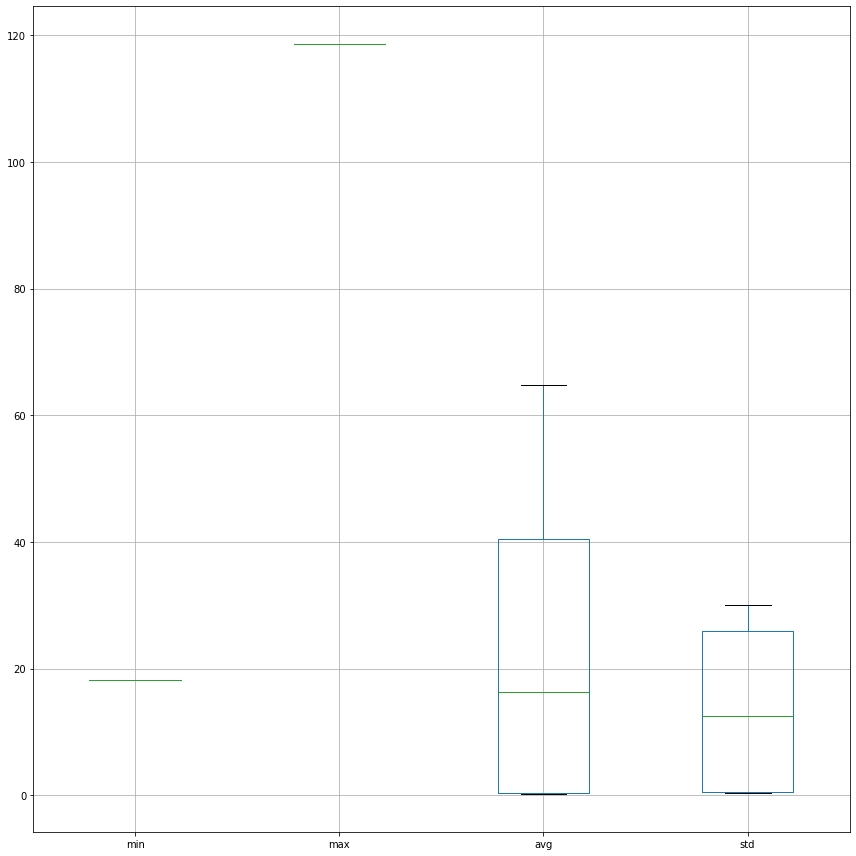

In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [12, 12]
plt.rcParams["figure.autolayout"] = True
data = np.random.randn(5, 5)
min = df_train['MonthlyCharges'].min(0)
max = df_train['MonthlyCharges'].max(0)
avg = df_train.mean(0)
std = df_train.std(0)
df = pd.DataFrame(dict(min=min, max=max, avg=avg, std=std))
df.boxplot()
plt.show()

**Question 3:Which is the fastest and easiest mode of payment?**

In [54]:
df_train['PaymentMethod'].value_counts()

Electronic check             1893
Mailed check                 1305
Bank transfer (automatic)    1219
Credit card (automatic)      1217
Name: PaymentMethod, dtype: int64

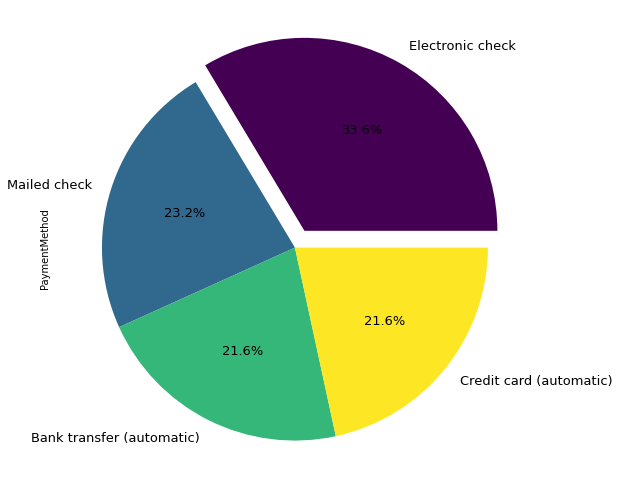

In [56]:
df_train['PaymentMethod'].value_counts().plot(kind='pie', figsize=(16,7), autopct='%1.1f%%',explode=(0.1,0,0,0), fontsize=13, colormap='viridis')

Nearly, **33.6%** customers prefer **Electronic Check** as mode of payment

In [57]:
df_train['PaymentMethod'].replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)

**Question 4: Do customers prefer paperless billing?**

In [58]:
df_train['PaperlessBilling'].value_counts()

Yes    3321
No     2313
Name: PaperlessBilling, dtype: int64

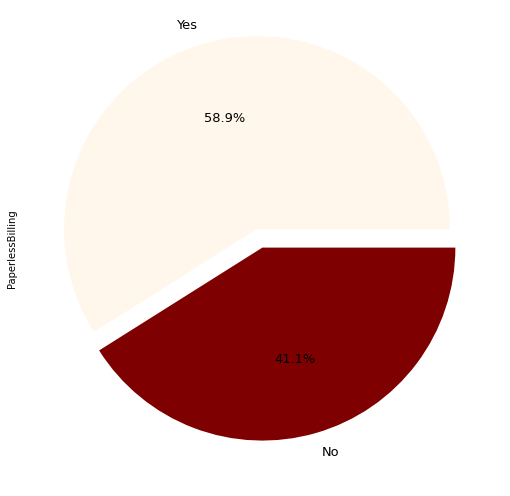

In [59]:
df_train['PaperlessBilling'].value_counts().plot(kind='pie', figsize=(16,7), autopct='%1.1f%%',explode=(0.1,0), fontsize=13, colormap='OrRd')

Around **58.9%** choose Paperless billing caring for environmental purpose while **41.1%** like traditional method of billing for documentation purpose

In [60]:
df_train['PaperlessBilling'].replace(['Yes','No'],[0,1],inplace=True)

**Question 5:Who are the longest tenure customers?**

In [72]:
df_train['tenure'].nunique()

73

In [73]:
df_train['tenure'].describe()

count    5634.000000
mean       32.277955
std        24.555211
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

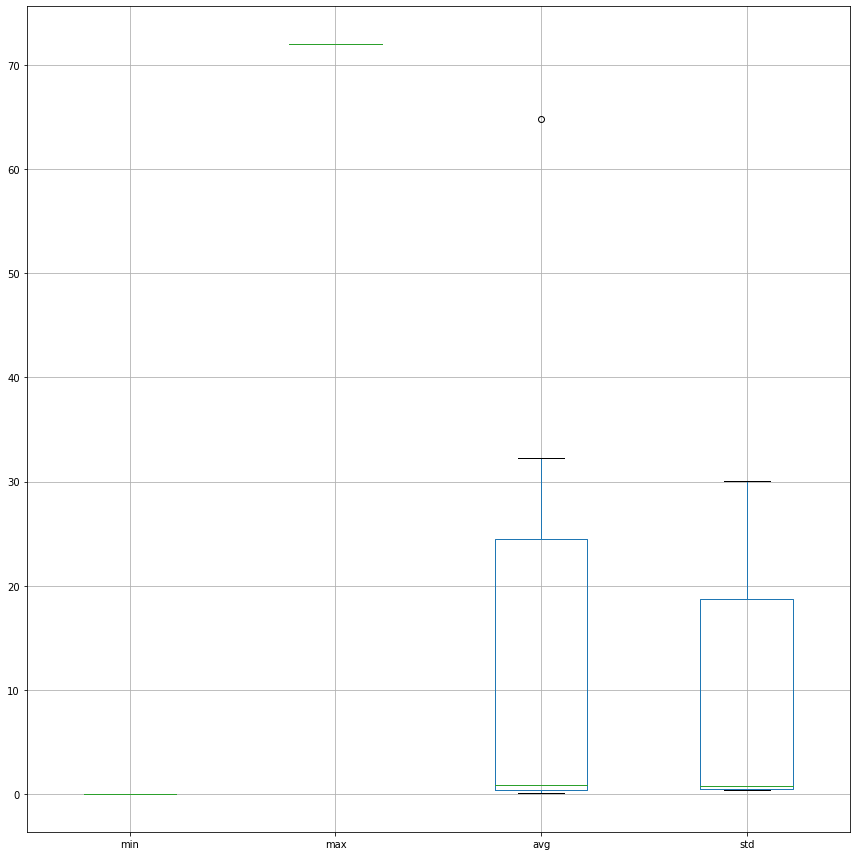

In [74]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [12, 12]
plt.rcParams["figure.autolayout"] = True
data = np.random.randn(5, 5)
min = df_train['tenure'].min(0)
max = df_train['tenure'].max(0)
avg = df_train.mean(0)
std = df_train.std(0)
df = pd.DataFrame(dict(min=min, max=max, avg=avg, std=std))
df.boxplot()
plt.show()

In [75]:
tenure_service=df_train.pivot_table(index='SeniorCitizen', values='tenure', aggfunc='sum')
tenure_service

,tenure
SeniorCitizen,
0,151222
1,30632


Non Senior Citizens have been Long-tenured customers **(84%)** 
While Senior Citizens are short-tenured customers **(16%)**

**Question 6:How many types of Internet service providers are there and which is in highest use?**

In [76]:
df_train['InternetService'].value_counts()

Fiber optic    2479
DSL            1934
No             1221
Name: InternetService, dtype: int64

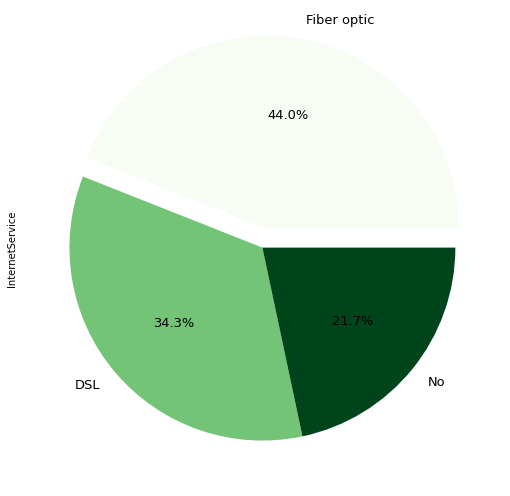

In [79]:
df_train['InternetService'].value_counts().plot(kind='pie', figsize=(16,7), autopct='%1.1f%%',explode=(0.1,0,0), fontsize=13, colormap='Greens')

- Around 44% customers have chosen fiber optic as their internet provider.
- Fiber optic cables are able to transmit data faster than copper cables because they use light instead of electrical pulses to carry data from one point to another.
- This light is able to travel a lot further and a lot faster than copper cables in a much shorter amount of time. 

In [80]:
df_train['InternetService'].replace(['Fiber optic','DSL','No'],[0,1,2],inplace=True)

In [95]:
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')

In [96]:
df_train['Partner'].replace(['No','Yes'], [0, 1], inplace = True)

In [97]:
df_train['Dependents'].replace(['No','Yes'],[0,1], inplace=True)

In [98]:
df_train['PhoneService'].replace(['No','Yes'],[0,1],inplace=True)

In [99]:
df_train['MultipleLines'].replace(['No','Yes'],[0,1],inplace=True)

In [100]:
df_train['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [101]:
df_train['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [102]:
df_train['TechSupport'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [103]:
df_train['Churn'].replace(['Yes','No'],[0,1],inplace=True)

In [104]:
df_train['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [105]:
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,0,0,1,1,12,1,0,2,2,...,2,2,2,2,1,1,1,19.70,258.35,1
1,6261-RCVNS,1,0,0,0,42,1,0,1,1,...,1,1,0,1,2,1,3,73.90,3160.55,0
2,2176-OSJUV,0,0,1,0,71,1,1,1,1,...,0,1,0,0,1,1,2,65.15,4681.75,1
3,6161-ERDGD,0,0,1,1,71,1,1,1,1,...,1,1,1,1,2,1,0,85.45,6300.85,1
4,2364-UFROM,0,0,0,0,30,1,0,1,1,...,0,1,1,0,2,1,0,70.40,2044.75,1


In [106]:
df_train.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

#### Checking Covariance between the variables

In [108]:
df_train.cov()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,0.250030,-0.000107,0.001255,-0.002981,-0.109385,0.002035,-0.007223,-0.002111,0.000664,-0.003846,-0.005470,-0.003962,-0.003674,-0.004642,-0.002286,0.002762,0.261630,-3.864405e+00,-0.003403
SeniorCitizen,-0.000107,0.135695,0.002240,-0.035094,0.212055,0.001517,-0.074625,-0.061644,-0.045142,-0.045328,-0.066301,-0.037472,-0.033982,-0.032225,-0.028123,-0.036197,2.497779,9.182574e+01,-0.023218
Partner,0.001255,0.002240,0.249628,0.102966,4.700331,0.001480,-0.000830,0.031022,0.031854,0.034874,0.026124,0.027264,0.026585,0.083055,0.001369,0.072594,1.435674,3.576291e+02,0.031147
Dependents,-0.002981,-0.035094,0.102966,0.208300,1.807905,-0.001109,0.065329,0.069983,0.058160,0.055960,0.065737,0.050079,0.045329,0.064825,0.024860,0.062766,-1.627423,6.440956e+01,0.030848
tenure,-0.109385,0.212055,4.700331,1.807905,602.958410,0.032850,-0.741050,2.755045,3.352201,3.304811,2.640797,2.484627,2.532528,9.883564,-0.212304,9.536801,185.601249,4.605581e+04,3.836281
PhoneService,0.002035,0.001517,0.001480,-0.001109,0.032850,0.087678,-0.021683,0.029753,0.034976,0.032921,0.028500,0.038786,0.037225,-0.002169,-0.002740,-0.002862,2.208713,7.405781e+01,-0.002782
InternetService,-0.007223,-0.074625,-0.000830,0.065329,-0.741050,-0.021683,0.606978,0.474384,0.417515,0.411405,0.471982,0.368743,0.368276,0.121913,0.143168,0.155510,-21.233678,-7.588406e+02,0.109956
OnlineSecurity,-0.002111,-0.061644,0.031022,0.069983,2.755045,0.029753,0.474384,0.635346,0.467757,0.464031,0.501423,0.426868,0.426026,0.168670,0.129710,0.191829,-14.922924,-2.793952e+02,0.116714
OnlineBackup,0.000664,-0.045142,0.031854,0.058160,3.352201,0.034976,0.417515,0.467757,0.608833,0.451664,0.468030,0.430086,0.426798,0.152897,0.100349,0.153368,-12.656738,-1.511849e+02,0.101234
DeviceProtection,-0.003846,-0.045328,0.034874,0.055960,3.304811,0.032921,0.411405,0.464031,0.451664,0.606387,0.473697,0.453794,0.455096,0.169142,0.102077,0.166538,-11.948932,-1.359241e+02,0.096929



**Covariance indicates the direction of the linear relationship between variables.**

**Covariance can vary between -∞ and +∞**


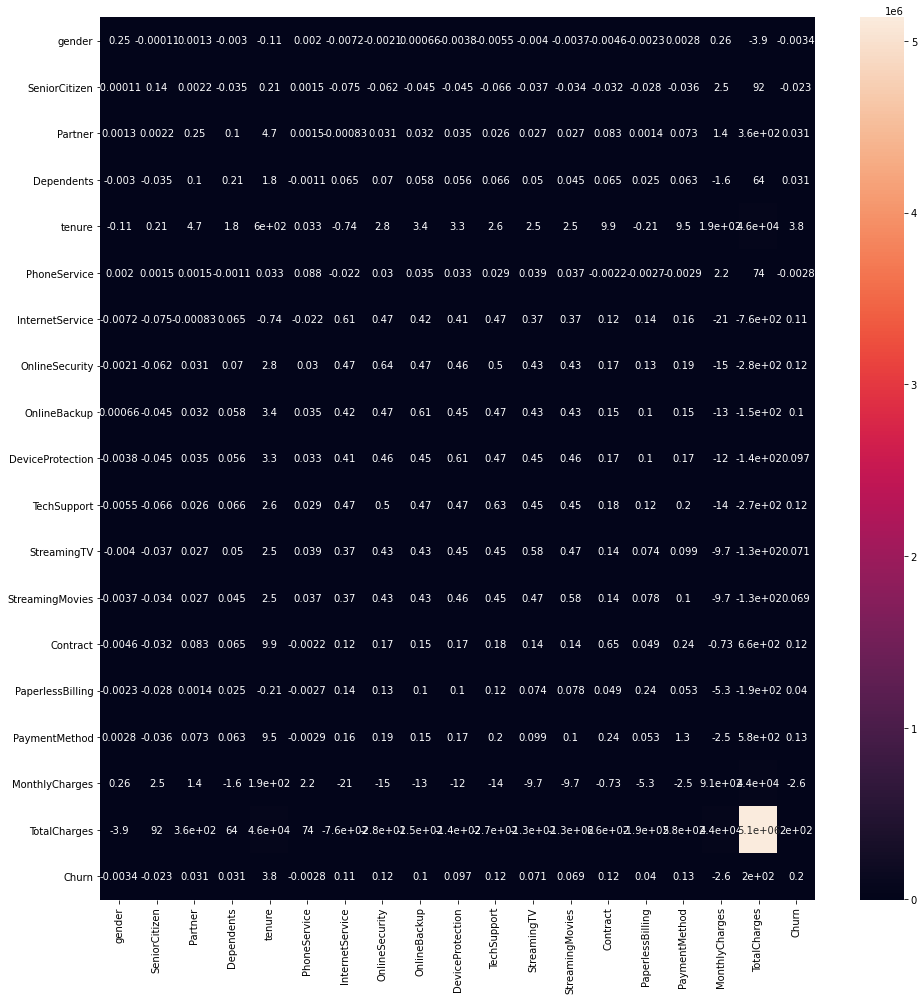

In [109]:
plt.figure(figsize=(14,14))
sns.heatmap(df_train.cov(), annot = True)

#### Checking the correlation between the variables

In [110]:
x=df_train.corr()
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.000579,0.005025,-0.013061,-0.008909,0.013742,-0.018542,-0.005296,0.001702,-0.009878,-0.013742,-0.010384,-0.009660,-0.011554,-0.009294,0.004810,0.017380,-0.003410,-0.015329
SeniorCitizen,-0.000579,1.000000,0.012169,-0.208738,0.023443,0.013908,-0.260025,-0.209943,-0.157055,-0.158020,-0.226086,-0.133297,-0.121275,-0.108870,-0.155178,-0.085558,0.225234,0.109925,-0.141966
Partner,0.005025,0.012169,1.000000,0.451545,0.383123,0.010001,-0.002133,0.077898,0.081709,0.089635,0.065679,0.071506,0.069950,0.206879,0.005570,0.126511,0.095449,0.315838,0.140414
Dependents,-0.013061,-0.208738,0.451545,1.000000,0.161319,-0.008210,0.183727,0.192372,0.163316,0.157455,0.180926,0.143785,0.130568,0.176765,0.110715,0.119742,-0.118445,0.062330,0.152236
tenure,-0.008909,0.023443,0.383123,0.161319,1.000000,0.004518,-0.038736,0.140760,0.174959,0.172834,0.135090,0.132592,0.135586,0.500916,-0.017574,0.338165,0.251072,0.828001,0.351885
PhoneService,0.013742,0.013908,0.010001,-0.008210,0.004518,1.000000,-0.093989,0.126061,0.151380,0.142775,0.120902,0.171645,0.165269,-0.009115,-0.018807,-0.008417,0.247773,0.110465,-0.021163
InternetService,-0.018542,-0.260025,-0.002133,0.183727,-0.038736,-0.093989,1.000000,0.763904,0.686810,0.678123,0.760977,0.620206,0.621431,0.194741,0.373521,0.173796,-0.905316,-0.429847,0.317882
OnlineSecurity,-0.005296,-0.209943,0.077898,0.192372,0.140760,0.126061,0.763904,1.000000,0.752084,0.747597,0.790190,0.701758,0.702645,0.263346,0.330769,0.209546,-0.621885,-0.154699,0.329801
OnlineBackup,0.001702,-0.157055,0.081709,0.163316,0.174959,0.151380,0.686810,0.752084,1.000000,0.743347,0.753454,0.722278,0.719083,0.243862,0.261408,0.171141,-0.538808,-0.085515,0.292221
DeviceProtection,-0.009878,-0.158020,0.089635,0.157455,0.172834,0.142775,0.678123,0.747597,0.743347,1.000000,0.764114,0.763629,0.768305,0.270316,0.266446,0.186213,-0.509701,-0.077038,0.280358


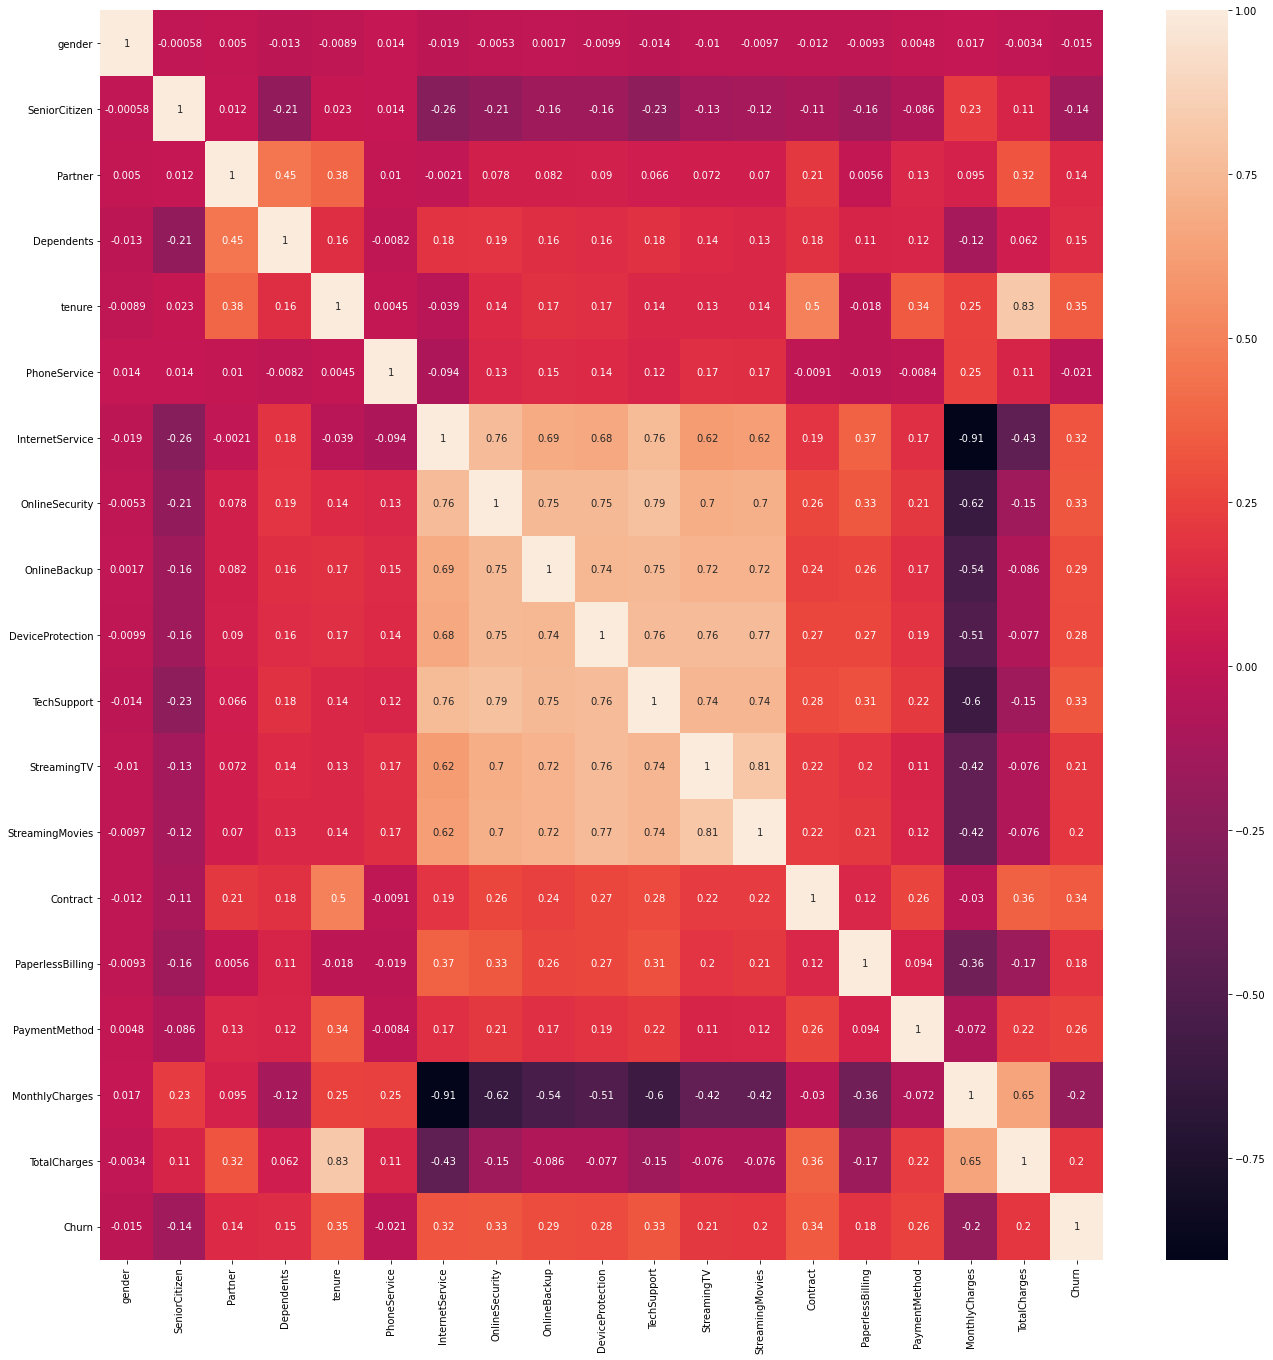

In [111]:
plt.figure(figsize=(19,19))
sns.heatmap(data=x, annot=True)

In [112]:
df_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [113]:
cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [114]:
cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [115]:
X = df_train[cols]

In [116]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,0,0,1,1,12,1,0,2,2,...,2,2,2,2,1,1,1,19.70,258.35,1
1,6261-RCVNS,1,0,0,0,42,1,0,1,1,...,1,1,0,1,2,1,3,73.90,3160.55,0
2,2176-OSJUV,0,0,1,0,71,1,1,1,1,...,0,1,0,0,1,1,2,65.15,4681.75,1
3,6161-ERDGD,0,0,1,1,71,1,1,1,1,...,1,1,1,1,2,1,0,85.45,6300.85,1
4,2364-UFROM,0,0,0,0,30,1,0,1,1,...,0,1,1,0,2,1,0,70.40,2044.75,1


In [117]:
y=df_train['Churn']

In [118]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Churn, dtype: int64

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [120]:
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1867,1986-PHGZF,0,1,0,0,18,1,1,1,1,...,0,0,0,0,0,0,3,58.40,964.90,1
1571,0670-KDOMA,1,0,0,0,1,1,0,2,2,...,2,2,2,2,0,0,1,20.25,20.25,1
5407,0363-QJVFX,0,0,0,0,32,1,1,0,1,...,0,1,1,1,0,0,3,108.15,3432.90,0
5047,0979-PHULV,0,0,1,1,69,1,1,0,0,...,1,0,1,1,0,0,3,99.45,7007.60,0
3528,7242-QZLXF,0,0,0,1,1,0,No phone service,1,0,...,0,0,0,0,0,0,0,25.30,25.30,0


In [121]:
X_train.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4502.000000,4507.000000
mean,0.496339,0.162858,0.481251,0.295318,32.148436,0.905258,0.769692,0.715775,0.765476,0.771688,0.715332,0.812958,0.821833,0.658087,0.408032,1.295984,65.062647,2288.055298,0.727979
std,0.500042,0.369277,0.499704,0.456236,24.508283,0.292890,0.777933,0.794582,0.779382,0.777238,0.794702,0.761554,0.757846,0.805015,0.491524,1.147873,30.084200,2271.533129,0.445050
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.750000,385.137500,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,70.700000,1406.775000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,90.050000,3832.900000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.650000,8670.100000,1.000000


In [122]:
X_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4085,1045-LTCYT,1,0,1,1,8,1,0,2,2,...,2,2,2,2,0,1,3,21.05,139.75,1
2689,2037-XJFUP,0,0,1,0,33,1,0,0,0,...,1,0,1,1,2,0,0,95.80,3036.75,0
2655,5124-EOGYE,0,0,0,0,31,1,0,2,2,...,2,2,2,2,1,1,1,20.45,638.55,1
3888,0581-BXBUB,1,1,0,0,4,1,0,0,0,...,0,0,0,0,0,1,0,72.75,317.75,1
1507,7492-TAFJD,0,0,1,1,7,0,No phone service,1,1,...,1,0,0,0,1,1,1,38.55,280.00,1


In [123]:
X_test.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1124.000000,1127.000000
mean,0.496007,0.157941,0.472937,0.297249,32.795918,0.893523,0.804791,0.734694,0.804791,0.802130,0.754215,0.838509,0.832298,0.665484,0.420586,1.377995,63.645297,2251.051246,0.738243
std,0.500206,0.364848,0.499489,0.457250,24.746155,0.308585,0.783406,0.807202,0.783406,0.784437,0.801263,0.769425,0.772130,0.797914,0.493872,1.149165,30.174746,2246.455491,0.439786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.950000,19.050000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.550000,417.737500,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,69.150000,1334.825000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,88.975000,3683.775000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,117.800000,8684.800000,1.000000


In [124]:
y_train.head()

1867    1
1571    1
5407    0
5047    0
3528    0
Name: Churn, dtype: int64

In [125]:
y_train.describe()

count    4507.000000
mean        0.727979
std         0.445050
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

In [126]:
y_test.head()

4085    1
2689    0
2655    1
3888    1
1507    1
Name: Churn, dtype: int64

In [127]:
y_test.describe()

count    1127.000000
mean        0.738243
std         0.439786
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [130]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LogisticRegression().fit(X_train, y_train)

In [132]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [133]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression() 
clf.fit(X_train, y_train)

LogisticRegression()

In [134]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [135]:
y_pred_train = clf.predict(X_train)

In [136]:
y_pred_test = clf.predict(X_test)

In [137]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 1.0


In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [139]:
from sklearn import metrics
RMSE_train=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
print('the Root Mean Squared Error for Train data is  :',RMSE_train)

the Root Mean Squared Error for Train data is  : 0.0


In [140]:
from sklearn import metrics
RMSE_test=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
print('the Root Mean Squared Error for Test data is  :',RMSE_test)

the Root Mean Squared Error for Test data is  : 0.0


Model Evalution 

In [141]:
cols_1 = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 
       'MonthlyCharges', 'TotalCharges', 'Churn']

In [142]:
cols_1

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'InternetService',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [143]:
X1 = df_train[cols_1]

In [144]:
X1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,0,0,1,1,12,1,2,2,2,1,19.70,258.35,1
1,6261-RCVNS,1,0,0,0,42,1,1,0,1,2,73.90,3160.55,0
2,2176-OSJUV,0,0,1,0,71,1,1,0,0,1,65.15,4681.75,1
3,6161-ERDGD,0,0,1,1,71,1,1,1,1,2,85.45,6300.85,1
4,2364-UFROM,0,0,0,0,30,1,1,1,0,2,70.40,2044.75,1


In [146]:
y1=df_train['Churn']

In [147]:
y1.head()

0    1
1    0
2    1
3    1
4    1
Name: Churn, dtype: int64

In [148]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

In [149]:
X1_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
1298,5243-SAOTC,0,0,0,0,54,1,0,0,0,0,79.85,4308.25,1
849,3345-PBBFH,0,0,1,0,8,1,1,0,0,0,49.55,393.45,1
2882,0531-ZZJWQ,0,1,1,0,55,1,0,0,0,0,74.00,4052.40,1
2404,1871-MOWRM,0,0,1,0,12,1,0,0,0,0,80.85,866.45,0
4536,2369-FEVNO,0,0,0,0,1,1,2,2,2,0,19.90,19.90,1


In [150]:
X1_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
4085,1045-LTCYT,1,0,1,1,8,1,2,2,2,0,21.05,139.75,1
2689,2037-XJFUP,0,0,1,0,33,1,0,1,1,2,95.80,3036.75,0
2655,5124-EOGYE,0,0,0,0,31,1,2,2,2,1,20.45,638.55,1
3888,0581-BXBUB,1,1,0,0,4,1,0,0,0,0,72.75,317.75,1
1507,7492-TAFJD,0,0,1,1,7,0,1,0,0,1,38.55,280.00,1


In [151]:
y1_train.head()

1298    1
849     1
2882    1
2404    0
4536    1
Name: Churn, dtype: int64

In [152]:
y1_test.head()

4085    1
2689    0
2655    1
3888    1
1507    1
Name: Churn, dtype: int64

In [153]:
X1_train.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
count,4225.000000,4225.000000,4225.00000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4220.000000,4225.000000
mean,0.498698,0.161420,0.48213,0.295621,32.110533,0.904852,0.768284,0.811834,0.820118,0.659645,65.108308,2279.631339,0.728284
std,0.500057,0.367962,0.49974,0.456376,24.460405,0.293454,0.777913,0.761498,0.758052,0.804310,30.064212,2262.484120,0.444897
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,35.800000,391.375000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,28.000000,1.000000,1.000000,1.000000,1.000000,0.000000,70.750000,1402.125000,1.000000
75%,1.000000,0.000000,1.00000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.050000,3807.562500,1.000000
max,1.000000,1.000000,1.00000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,118.650000,8670.100000,1.000000


In [154]:
X1_test.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
count,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1406.00000,1409.000000
mean,0.488999,0.163236,0.471966,0.295955,32.779986,0.897090,0.801987,0.836764,0.835344,0.659333,63.792051,2283.75697,0.735273
std,0.500056,0.369712,0.499391,0.456633,24.839310,0.303949,0.782331,0.767992,0.768614,0.801490,30.216144,2278.89638,0.441344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.850000,19.05000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.450000,394.38750,0.000000
50%,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,1.000000,1.000000,1.000000,0.000000,69.400000,1365.50000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.350000,3769.05000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,117.800000,8684.80000,1.000000


In [155]:
y1_train.describe()

count    4225.000000
mean        0.728284
std         0.444897
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

In [156]:
y1_test.head()

4085    1
2689    0
2655    1
3888    1
1507    1
Name: Churn, dtype: int64

In [157]:
from sklearn.linear_model import LogisticRegression

In [163]:
X1 = X1.apply(pd.to_numeric, errors='coerce')
y1 = y1.apply(pd.to_numeric, errors='coerce')

In [164]:
X1.fillna(0, inplace=True)
y1.fillna(0, inplace=True)

In [165]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)
clf = LogisticRegression().fit(X1_train, y1_train)

In [166]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X1_train, y1_train)

LogisticRegression()

In [167]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [168]:
y1_pred_train = clf.predict(X1_train)

In [169]:
y1_pred_test = clf.predict(X1_test)

In [170]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y1_test,y1_pred_test))

Accuracy score for test data is: 1.0


# Decision tree

In [171]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(criterion='mse')
model1.fit(X1_train, y1_train)

DecisionTreeRegressor()

In [172]:
y1_train_pred_dt=model1.predict(X1_train)
y1_test_pred_dt=model1.predict(X1_test)

In [173]:
from sklearn.tree import plot_tree

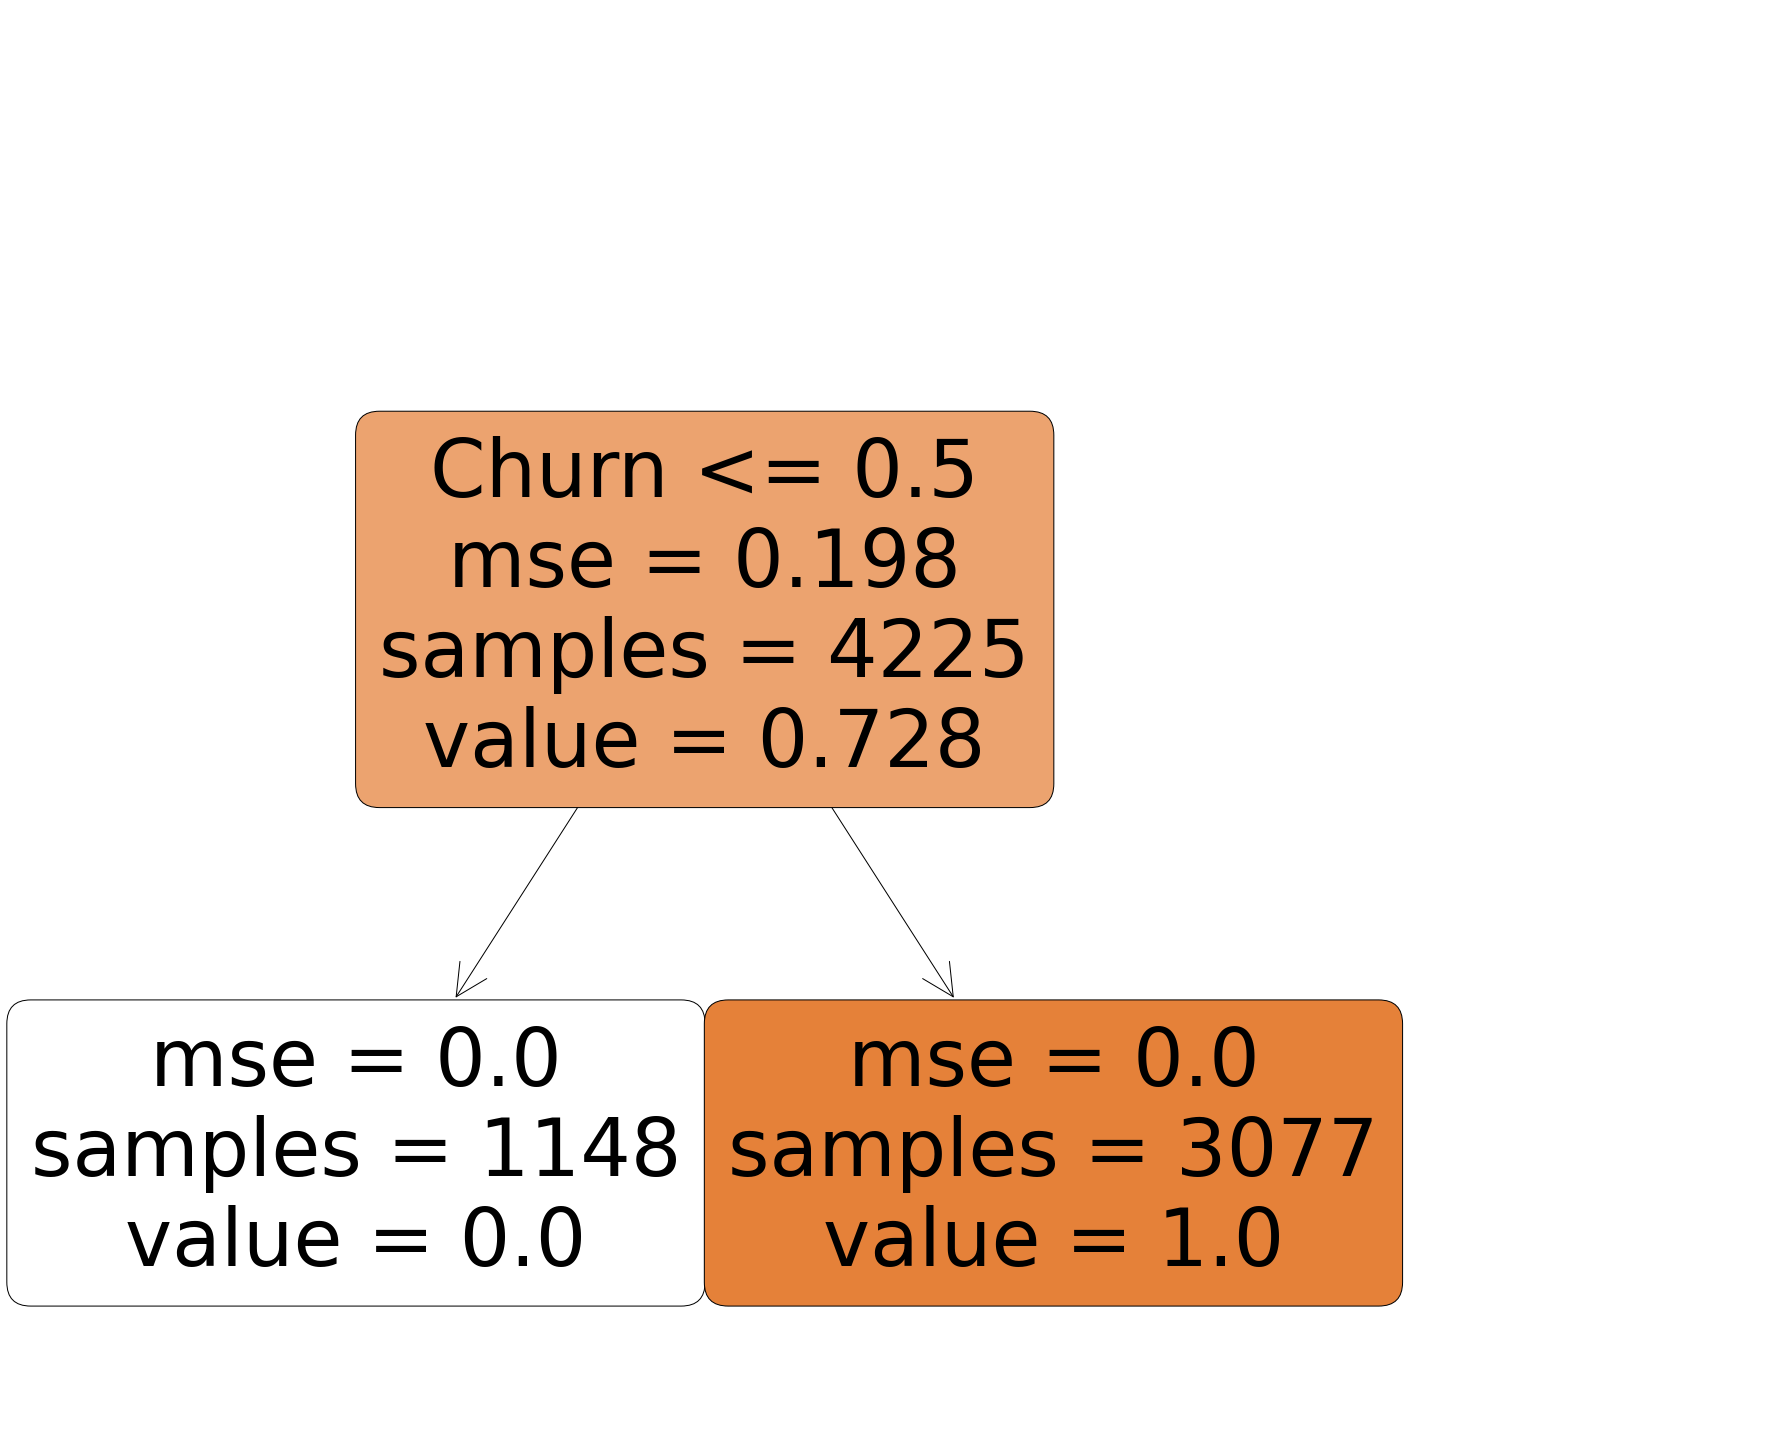

In [174]:
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(model1, feature_names=X1.columns, filled=True, rounded=True)

Text(0, 0.5, 'Predicted')

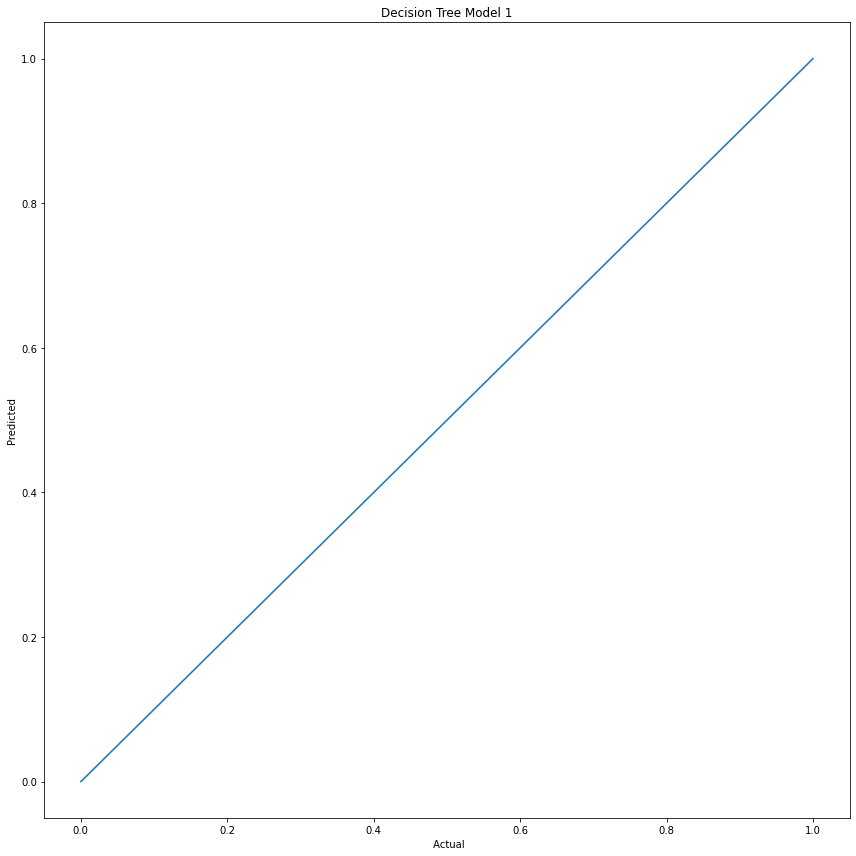

In [175]:
sns.lineplot(x=y1_test, y=y1_test_pred_dt)
plt.title('Decision Tree Model 1')
plt.xlabel(' Actual')
plt.ylabel('Predicted')

In [176]:
from sklearn import metrics
RMSE_train_dt=np.sqrt(metrics.mean_squared_error(y1_train,y1_train_pred_dt))
print('The RMSE Value of Train Dataset for Simple Decision Tree Model is  :',RMSE_train_dt)

The RMSE Value of Train Dataset for Simple Decision Tree Model is  : 0.0


In [177]:
from sklearn import metrics
RMSE_test_dt=np.sqrt(metrics.mean_squared_error(y1_test,y1_test_pred_dt))
print('The RMSE Value of Test Dataset for Simple Decision Tree Model is  :',RMSE_test_dt)

The RMSE Value of Test Dataset for Simple Decision Tree Model is  : 0.0


In [178]:
from sklearn.metrics import r2_score
r2_dt_train=r2_score(y1_train, y1_train_pred_dt)
print('The R-square value for Train Data of simple Decision Tree Model is :', r2_dt_train)

The R-square value for Train Data of simple Decision Tree Model is : 1.0


In [179]:
from sklearn.metrics import r2_score
r2_dt_test=r2_score(y1_test, y1_test_pred_dt)
print('The R-square value for Test Data of simple Decision Tree Model is :', r2_dt_test)

The R-square value for Test Data of simple Decision Tree Model is : 1.0


In [180]:
def Adjusted_r2(r_square,N): 
    return(1-(((1-r_square)*(N-1))/(N-6)))

In [181]:
adj_r2_train=Adjusted_r2(r2_dt_train,len(X1_train))
print('The Adjusted R-square of Decision Tree first model Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(r2_dt_test,len(X1_test))
print('The Adjusted R-square of Decision Tree first model Test Dataset is :', adj_r2_test)

The Adjusted R-square of Decision Tree first model Train Dataset is : 1.0
The Adjusted R-square of Decision Tree first model Test Dataset is : 1.0


In [182]:
output = pd.DataFrame({'customerID': df_test.index,'Churn': y1_pred_test})
output.to_csv('telecom_chrun.csv', index=False, header=False)